This code is used to reproduce the figures of the [IGARSS paper](https://arxiv.org/abs/2105.11726). 

This is a collaboration between [Seyed Ali Ahmadi](https://earthobserv.com/), [Michael Schmitt](https://schmitt-muc.github.io/), and [Ronny Hänsch](http://www.rhaensch.de/).

# Imports


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install adjustText

  Created wheel for adjustText: filename=adjustText-0.7.3-cp37-none-any.whl size=7100 sha256=9d8c1b7fc5704f1d884b6591b93c8897c2db6c3f306dbae57dd272aeb3bd67b1
  Stored in directory: /root/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built adjustText


In [ ]:
from adjustText import adjust_text

# Previous

In [ ]:
datasets = pd.read_csv('/content/Remote Sensing ML Datasets - Tabellenblatt1.csv')

In [ ]:
print(datasets.columns)

Index(['ShortName', 'Dataset Name', 'Year of publication', 'Number of images',
       'Size of images', 'Size Measure', 'Task', 'Number of classes',
       'Volume (MB)', 'link'],
      dtype='object')


In [ ]:
pd.set_option('display.max_columns', 500)

In [ ]:
ds = datasets[['ShortName', 'Dataset Name', 'Year of publication', 'Number of images',
       'Size of images', 'Size Measure', 'Task', 'Number of classes',
       'Volume (MB)']]

In [ ]:
ds = ds.sort_values(by='Size Measure', ascending=False)

In [ ]:
tasks = list(pd.unique(ds['Task']))
print(tasks)
ds = ds.dropna(axis=0, subset=['Task'])
tasks = list(pd.unique(ds['Task']))
print(tasks)

['OD', 'Other', 'CD', 'SemSeg', 'Class', nan, 'Class/SemSeg', 'CR', 'SR']
['OD', 'Other', 'CD', 'SemSeg', 'Class', 'Class/SemSeg', 'CR', 'SR']


In [ ]:
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
rect_scatter = [left, bottom, width, height]

# colors = cm.get_cmap('PRGn')
# colors = colors(np.linspace(0, 1, 8))
colors = np.array([[255, 0, 0], [128, 0, 0], [0, 255, 0], [0, 128, 0], \
                   [0, 0, 128], [0, 255, 255], [255, 255, 0], [255, 0, 255]])/255
texts = []

plt.figure(figsize=(20, 18))
plt.style.use('bmh')

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)

for index, row in ds.iterrows():
    # c = colors[tasks.index(row['Task']), :3]
    c = colors[tasks.index(row['Task']), :]

    ax_scatter.scatter(row['Year of publication'], np.log(row['Volume (MB)']), 
                       s=np.sqrt(row['Size Measure'])/200, c=c, 
                       edgecolors='k', alpha=0.85)
    plt.plot(row['Year of publication'], np.log(row['Volume (MB)']), '.k', ms=2)
    texts.append(plt.text(row['Year of publication'], np.log(row['Volume (MB)']),
                 row['Dataset Name'], fontsize=7))
    

ax_scatter.set_xlim((2006, 2022))
plt.xlabel('Year of publication')
plt.ylabel('Volume (MB) - Log Scale')
plt.title('Datasets distributed by their Volume in time (Year)' + \
          '\nCircle size is related to "Size Measure"')
legend_elements = [Line2D([0], [0], marker='s', markerfacecolor=colors[0], color='k', label=tasks[0], markersize=25), 
                   Line2D([0], [0], marker='s', markerfacecolor=colors[1], color='k', label=tasks[1], markersize=25),
                   Line2D([0], [0], marker='s', markerfacecolor=colors[2], color='k', label=tasks[2], markersize=25), 
                   Line2D([0], [0], marker='s', markerfacecolor=colors[3], color='k', label=tasks[3], markersize=25),
                   Line2D([0], [0], marker='s', markerfacecolor=colors[4], color='k', label=tasks[4], markersize=25),
                   Line2D([0], [0], marker='s', markerfacecolor=colors[5], color='k', label=tasks[5], markersize=25),
                   Line2D([0], [0], marker='s', markerfacecolor=colors[6], color='k', label=tasks[6], markersize=25),
                   Line2D([0], [0], marker='s', markerfacecolor=colors[7], color='k', label=tasks[7], markersize=25)]
plt.legend(handles=legend_elements, loc='lower left', labelspacing=2)
plt.tight_layout()
# adjust_text(texts)
plt.savefig('Timeline graph.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

0.725
2863.5642126552707
(8,)


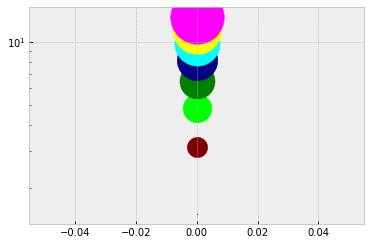

In [ ]:
print(np.amin(np.sqrt(ds['Size Measure']))/200)
print(np.amax(np.sqrt(ds['Size Measure']))/200)

Circles = np.linspace(np.amin(np.sqrt(ds['Size Measure']))/200,
                      np.amax(np.sqrt(ds['Size Measure']))/200,
                      8)
print(Circles.shape)

Ys = np.linspace(np.amin(np.log(ds['Volume (MB)'])), 
                 np.amax(np.log(ds['Volume (MB)'])), 
                 8)

plt.figure()
for i in range(8):
    c = colors[i, :]
    plt.scatter(0, Ys[i], s=Circles[i], c=c)
# plt.yscale('log')
plt.show()

In [ ]:
print(ds.groupby(['Task']).sum())

ds_sub = ds.groupby(['Task']).sum()['Size Measure']
ds_sub['Class'] += ds_sub['Class/SemSeg']
ds_sub['SemSeg'] += ds_sub['Class/SemSeg']
ds_sub = ds_sub.drop(['Class/SemSeg'])
print(ds_sub)

              Year of publication  Number of images  Size of images  \
Task                                                                  
CD                        18169.0           61113.0         13726.0   
CR                         2020.0          122218.0           256.0   
Class                     64520.0         2751566.0         15225.0   
Class/SemSeg               4037.0          205248.0           906.0   
OD                        44390.0        10606268.0         49268.0   
Other                      6059.0          467098.0          1851.0   
SR                         2018.0            1160.0           384.0   
SemSeg                    22175.0          248816.0         26471.0   

              Size Measure  Number of classes  Volume (MB)  
Task                                                        
CD            8.464762e+10               39.0      82748.0  
CR            8.009679e+09                0.0     272000.0  
Class         7.218335e+10              383.0

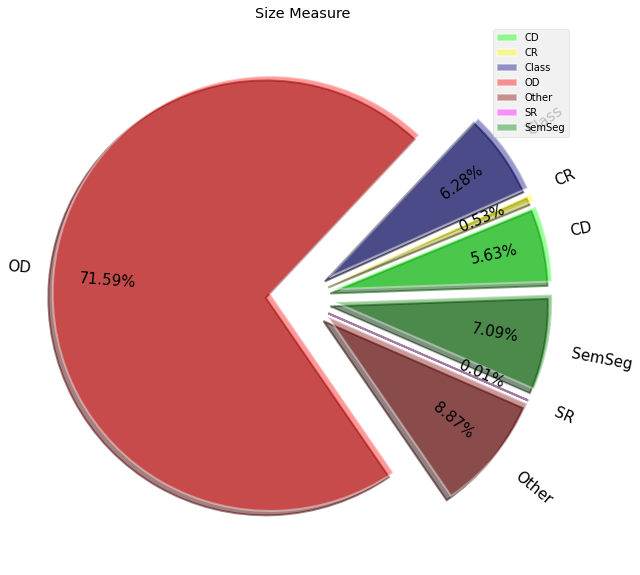

In [ ]:
ds_sub = ds.groupby(['Task']).sum()['Size Measure']
ds_sub['Class'] += ds_sub['Class/SemSeg']
ds_sub['SemSeg'] += ds_sub['Class/SemSeg']
ds_sub = ds_sub.drop(['Class/SemSeg'])

colors = np.array([[255, 0, 0], [128, 0, 0], [0, 255, 0], [0, 128, 0], \
                   [0, 0, 128], [0, 255, 255], [255, 255, 0], [255, 0, 255]])/255
colors = [colors[2], colors[-2], colors[4], colors[0], colors[1], colors[-1], colors[3]]

# explode = [0.2, 0.15, 0.1, 0, 0.3, 0.25]
explode = np.ones((7, )) * 0.15
# explode = np.ones((7, )) * 0.05
plt.figure(figsize=(10, 10))
patches, labels, pct_texts = plt.pie(ds_sub, autopct='%.2f%%', startangle=2, 
                                     rotatelabels=True, pctdistance=0.75, 
                                     shadow=True, colors=colors, 
                                     textprops={'fontsize': 15, 'color':'k'},
                                     labels=ds_sub.index, explode=explode, 
                                     wedgeprops={'alpha':0.4, 'edgecolor':'w',
                                                 'linewidth':2})
for label, pct_text in zip(labels, pct_texts):
    pct_text.set_rotation(label.get_rotation())
plt.legend(ds_sub.index)
plt.title('Size Measure')
plt.savefig('SizeMeasure Pie Chart.png')
plt.show()

In [ ]:
# ds.groupby(['Task']).sum()['Volume (MB)'].plot.pie(autopct='%.2f', 
#                                                    figsize=(7, 7), 
#                                                 #    labels=None, 
#                                                    fontsize=8,
#                                                    labeldistance=1.01)
# colors = np.array([[255, 0, 0], [128, 0, 0], 
#                    [0, 255, 0], [0, 128, 0], 
#                    [0, 0, 128], [0, 255, 255],
#                    [255, 255, 0], [255, 0, 255]])/255

# plt.figure(figsize=(8, 8))
# patches, labels, pct_texts = plt.pie(ds.groupby(['Task']).sum()['Volume (MB)'],
#         autopct='%.2f', startangle=90, rotatelabels=True, pctdistance=0.85, shadow=True)
# for label, pct_text in zip(labels, pct_texts):
#     pct_text.set_rotation(label.get_rotation())
# plt.title('Volume (MB)')
# plt.show()

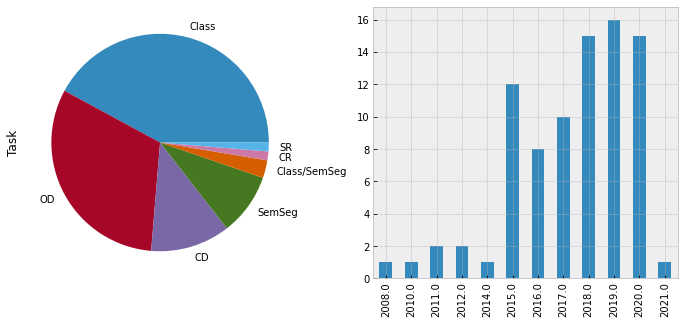

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
ds['Task'].value_counts().plot(kind='pie')
plt.subplot(122)
ds['Year of publication'].value_counts().reindex(np.sort(pd.unique(ds['Year of publication']))[:-1]).plot(kind='bar')
plt.show()

In [ ]:
# (np.sqrt(ds['Size Measure'])/200).value_counts(bins=5)

In [ ]:
# plt.figure(figsize=(8, 20))
# plt.subplot(311)
# (ds.groupby(['Task']).sum()['Volume (MB)']).plot(kind='pie')
# plt.subplot(312)
# (ds.groupby(['Task']).sum()['Number of images']).plot(kind='pie')
# plt.subplot(313)
# (ds.groupby(['Task']).sum()['Size Measure']).plot(kind='pie')
# plt.show()

In [ ]:
    # ax_scatter.scatter(row['Year of publication'], np.log(row['Size Measure']), \
    #                    s=np.float(row['Volume (MB)'])/100, color=c, edgecolors='k', alpha=0.85)
    # plt.plot(row['Year of publication'], np.log(row['Size Measure']), '.k', ms=2)
    # plt.text(row['Year of publication'], np.log(row['Size Measure']), \
    #          row['Dataset Name'], color=color)


# ax_scatter.set_ylim((9, 27.5))
# plt.ylabel('Size Measure (log scale)')

In [ ]:
# mpl.style.available

In [ ]:
# plt.figure(figsize=(10, 10))
# plt.grid('True')
# plt.style.use('bmh')
# colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c', 'w']
# for index, row in ds.iterrows():
#     color = colors[tasks.index(row['Task'])]
#     # plt.plot(row['Year of publication'], np.log(row['Size Measure']), 'o', \
#     #          ms=np.sqrt(row['Size of images'])/1.5, mfc=color, alpha=0.5)
#     plt.plot(row['Year of publication'], np.log(row['Size Measure']), 'o', \
#              ms=row['Size of images']/80, mfc=color, alpha=0.8, mec='k')
#     # plt.plot(row['Year of publication'], np.log(row['Size Measure']), 'o', \
#     #          ms=np.sqrt(row['Number of images'])/25, mfc=color, alpha=0.5)
#     # plt.plot(row['Year of publication'], np.log(row['Size Measure']), '.k', ms=2.2)
#     # plt.text(row['Year of publication'], np.log(row['Size Measure']), row['Dataset Name'])
#     plt.text(row['Year of publication'], np.log(row['Size Measure']), row['ShortName'])

# plt.xlim([2007, 2022])
# plt.xlabel('Year of publication')
# plt.ylabel('Size Measure (log scale)')
# plt.show()

In [ ]:
# def gauplot(centers, radiuses, xr=None, yr=None):
#         plt.figure(figsize=(10, 10))
#         nx, ny = 1000.,1000.
#         xgrid, ygrid = np.mgrid[xr[0]:xr[1]:(xr[1]-xr[0])/nx,yr[0]:yr[1]:(yr[1]-yr[0])/ny]
#         im = xgrid*0 + np.nan
#         xs = np.array([np.nan])
#         ys = np.array([np.nan])
#         fis = np.concatenate((np.linspace(-np.pi,np.pi,100), [np.nan]) )
#         cmap = plt.cm.gray
#         cmap.set_bad('white')
#         thresh = 3
#         for curcen,currad in zip(centers,radiuses):
#                 curim=(((xgrid-curcen[0])**2+(ygrid-curcen[1])**2)**.5)/currad*thresh
#                 im[curim<thresh]=np.exp(-.5*curim**2)[curim<thresh]
#                 xs = np.append(xs, curcen[0] + currad * np.cos(fis))
#                 ys = np.append(ys, curcen[1] + currad * np.sin(fis))
#         plt.imshow(np.flipud(im.T), cmap=cmap, extent=xr+yr)
#         plt.plot(xs, ys, 'r-')

In [ ]:
# centers = []
# radius = []
# for index, row in ds.iterrows():
#     centers.append((row['Year of publication'], np.log(row['Size Measure'])))
#     radius.append(row['Size of images']/8000)

# gauplot(centers, radius, [2007, 2022], [15, 27])
# # gauplot([(0,0), (2,3), (5,1), (6, 7), (6.1, 6.1)], [.3, .4, .5, 1, .4], [-1,10], [-1,10])

In [ ]:
# fig = plt.figure(figsize=(9, 9))
# ax = fig.add_subplot(111, projection='3d')

# for index, row in ds.iterrows():
#     ys = tasks.index(row['Task']) * 10
#     color = colors[tasks.index(row['Task'])]
#     ax.scatter(row['Year of publication'], ys, row['Size Measure']/1e9, \
#                s=row['Size of images']/10, facecolor=color, alpha=0.9)
#     ax.plot([row['Year of publication'], row['Year of publication']], [ys, ys], \
#             [0, row['Size Measure']/1e9], '--k', lw=0.5)

# ax.set_xlabel('Year of publication')
# ax.set_ylabel('Task')
# ax.set_zlabel('Size Measure')
# ax.view_init(elev=10, azim=200)
# plt.tight_layout()
# plt.show()

# Updated datasets version


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings("ignore")
!pip install adjustText
from adjustText import adjust_text

  Created wheel for adjustText: filename=adjustText-0.7.3-cp37-none-any.whl size=7097 sha256=dd8a5c5400cdcc820bbbe5b8d848edc4a14df502f7be6442a513c5119889b016
  Stored in directory: /root/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built adjustText


In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('Remote Sensing ML Datasets').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()

# Convert to a DataFrame and render.
import pandas as pd
datasets = pd.DataFrame.from_records(rows)

In [ ]:
# This is not neccessary because I read the sheet directly from the Drive.
# datasets = pd.read_excel('/content/Remote Sensing ML Datasets - Tabellenblatt1 UPDATED.xlsx')

In [ ]:
newheader = datasets.iloc[0]
datasets = datasets[1:]
datasets.columns = newheader

In [ ]:
datasets.columns

Index(['...', 'Sensor Type', 'Dataset Name', 'Year of publication',
       'Number of images', 'Size of images', 'Size Measure', 'Task',
       'Number of classes', 'Volume (MB)', 'link'],
      dtype='object', name=0)

In [ ]:
ds = datasets[['Dataset Name', 'Year of publication', 'Number of images',
               'Size of images', 'Size Measure', 'Task', 'Number of classes',
               'Volume (MB)']]
ds

,Dataset Name,Year of publication,Number of images,Size of images,Size Measure,Task,Number of classes,Volume (MB)
1,AID,2017,10000,600,3600000000,Class,30,2440
2,AID++,2018,400000,,,Class,46,
3,BCS,2015,51000,64,208896000,Class,2,
4,Oil Storage Tanks,2019,10000,512,2621440000,OD,,3000
5,BigEarthNet,2019,590326,120,8500694400,Class,,121000
...,...,...,...,...,...,...,...,...
186,,,,,,,,
187,,,,,,,,
188,,,,,,,,
189,,,,,,,,


In [ ]:
ds['Volume (MB)'] = ds['Volume (MB)'].replace('', np.nan)
ds['Size Measure'] = ds['Size Measure'].replace('', np.nan)

In [ ]:
a = ds[ds['Volume (MB)'].notna()]
b = a[a['Size Measure'].notna()]
b

,Dataset Name,Year of publication,Number of images,Size of images,Size Measure,Task,Number of classes,Volume (MB)
1,AID,2017,10000,600,3600000000,Class,30,2440
4,Oil Storage Tanks,2019,10000,512,2621440000,OD,,3000
5,BigEarthNet,2019,590326,120,8500694400,Class,,121000
6,Brazilian Coffee Scene,2015,2876,64,11780096,Class,2,4.50
7,BrazilDAM,2020,769,384,113393664,Class,2,57000
...,...,...,...,...,...,...,...,...
174,SPARCS,2016,80,1000,80000000,Other,,1400
175,Sentinel-2 Multitemporal Cities Pairs,2020,1520,600,547200000,CD,,10600
177,GTA-V SID,2020,121,500,30250000,SemSeg,,100
178,TTPLA,2020,1100,3840,9123840000,SemSeg,,4200


In [ ]:
b.loc[b['Task'] == 'Class/SemSeg', 'Task'] = 'SemSeg/Class'
b.loc[b['Task'] == 'OD/SemSeg', 'Task'] = 'SemSeg/OD'

In [ ]:
tasks = list(pd.unique(b['Task']))
print(tasks, len(tasks))

['Class', 'OD', 'SemSeg', 'CD', 'SemSeg/Class', 'CR', 'Other', 'SR', 'SemSeg/OD', 'OD/Class'] 10


In [ ]:
g = sorted(list(set(list(b['Year of publication']))))
g = np.array(g, dtype=int).tolist()
print(g)
ticks = np.arange(0, 4*len(g), 4)
print(ticks)

[2007, 2008, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
[ 0  4  8 12 16 20 24 28 32 36 40 44 48 52]


In [ ]:
# import random

# # colors = cm.get_cmap('Blues')
# # colors = colors(np.linspace(0, 1, len(tasks)))
# # colors = np.array([[255, 0, 0], [128, 0, 0], [0, 255, 0], [0, 128, 0], \
# #                    [0, 0, 128], [0, 255, 255], [255, 255, 0], [255, 0, 255]])/255
# # colors = ['black', 'goldenrod', 'darkgreen', 'red', 'slateblue', 'chartreuse', 'aqua', 'blue', 'deeppink', 'pink']
# # colors = ['black','darkgreen','orangered','gold','lime','aqua','blue','dodgerblue','deeppink','pink']
# # random.shuffle(colors)
# # colors

# colors = ['darkslategray', 'forestgreen', 'maroon', 'gold', 'lime', 'royalblue', 'aqua', 'blue', 'peachpuff', 'hotpink']
# random.shuffle(colors)
# colors

In [ ]:
# ['Class', 'OD', 'SemSeg', 'CD', "'SemSeg/Class'", 'CR', 'Other', 'SR', "'SemSeg/OD'", 'OD/Class'] 
colors = ['aqua', 'peachpuff', 'darkslategray', 'forestgreen', 'cornflowerblue',    # royalblue
          'hotpink', 'gold', 'lime', 'darkblue', 'maroon']

In [ ]:
# This is required for the Sheet read from Google.
b['Year of publication'] = b['Year of publication'].astype(int)
b['Volume (MB)'] = b['Volume (MB)'].astype(float)
b['Size Measure'] = b['Size Measure'].astype(float)

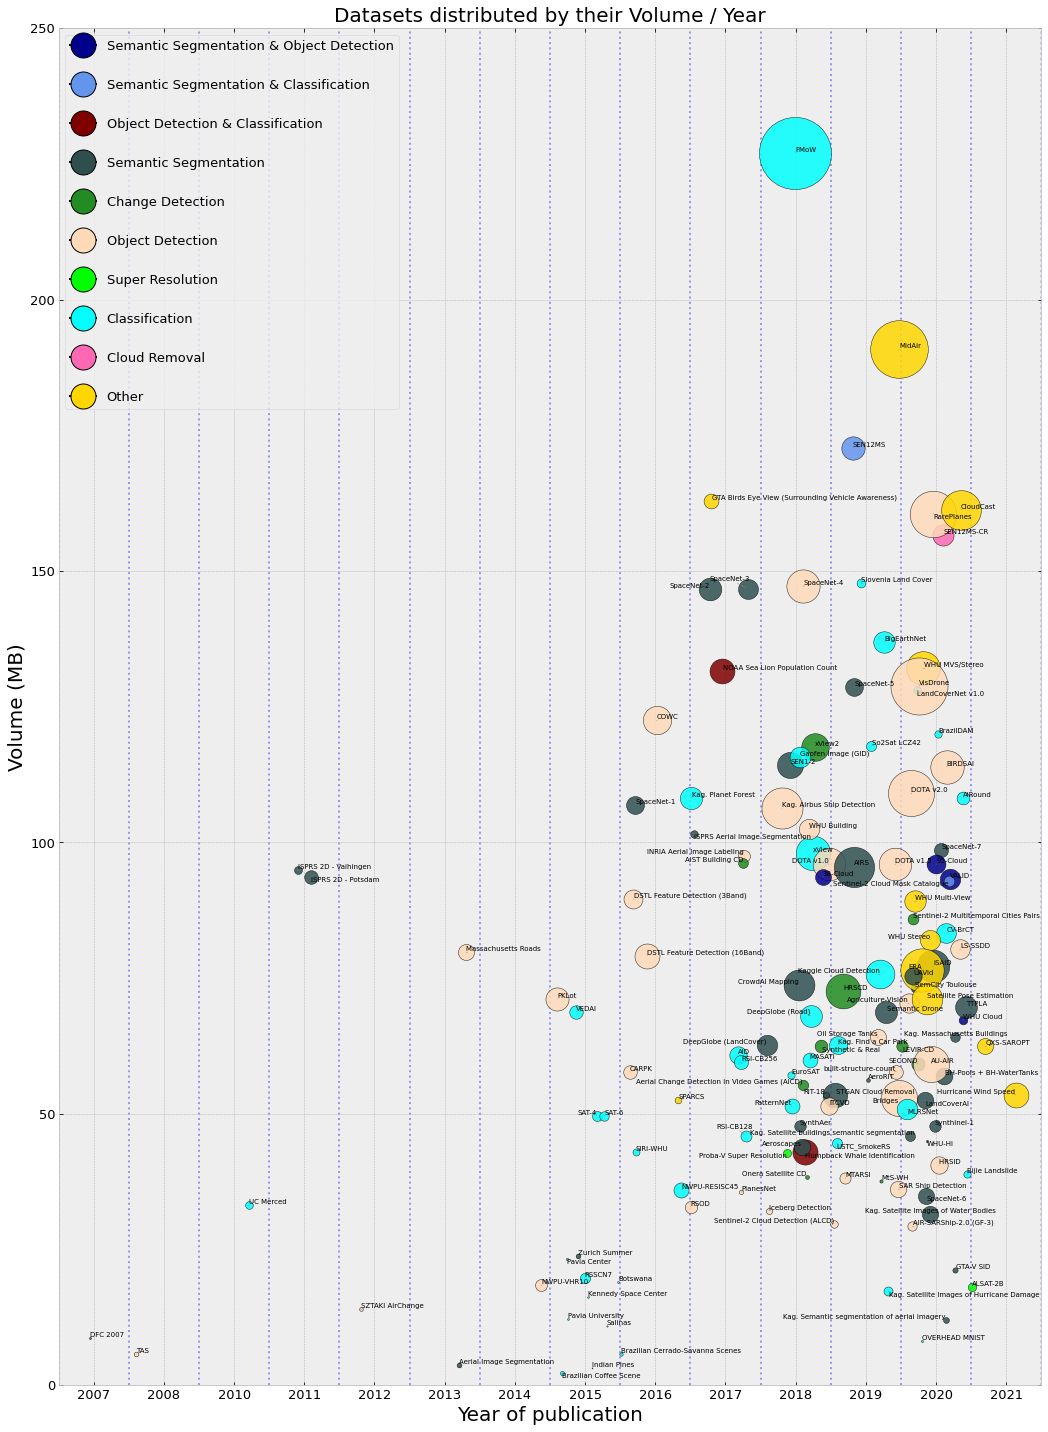

In [ ]:
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
rect_scatter = [left, bottom, width, height]

texts = []

plt.figure(figsize=(21, 29))
plt.style.use('bmh') # fivethirtyeight

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)

N = 2
for index, row in b.iterrows():
    # c = colors[tasks.index(row['Task']), :3]
    # c = colors[tasks.index(row['Task']), :]
    c = colors[tasks.index(row['Task'])]
    
    randomval = (N - (-N))*np.random.rand() + (-N)
    scat = ax_scatter.scatter(ticks[g.index(row['Year of publication'])] + randomval,  # row['Year of publication'] + randomval,
                              np.power(np.log(row['Volume (MB)']), 2), 
                              s=np.sqrt(row['Size Measure'])/200, color=c, 
                              edgecolors='k', alpha=0.85, zorder=2)     # 
    # plt.plot(ticks[g.index(row['Year of publication'])] + randomval,            # row['Year of publication'] + randomval,
    #          np.power(np.log(row['Volume (MB)']), 2), '.k', ms=2)
    texts.append(plt.text(ticks[g.index(row['Year of publication'])] + randomval,        # row['Year of publication'] + randomval,
                          np.power(np.log(row['Volume (MB)']), 2),
                          row['Dataset Name'], fontsize=7))
    
    # ax_scatter.scatter(row['Year of publication'], np.log(row['Volume (MB)']), 
    #                    s=np.sqrt(row['Size Measure'])/200, color=c, 
    #                    edgecolors='k', alpha=0.85)
    # plt.plot(row['Year of publication'], np.log(row['Volume (MB)']), '.k', ms=2)
    # texts.append(plt.text(row['Year of publication'], np.log(row['Volume (MB)']),
    #              row['Dataset Name'], fontsize=7))

for tick in ticks:
    plt.vlines(tick-N, 0, 250, colors='b', alpha=0.2, linestyles=':', zorder=1)
    plt.vlines(tick+N, 0, 250, colors='b', alpha=0.2, linestyles=':', zorder=1)

plt.xticks(ticks=ticks, labels=np.array(g, dtype=int), fontsize=13)
plt.yticks(ticks=np.arange(0, 300, 50), labels=np.arange(0, 300, 50), fontsize=13)
# ax_scatter.set_xlim((2006, 2022))
ax_scatter.set_xlim((min(ticks)-2, max(ticks)+2))
ax_scatter.set_ylim([0, 250])
plt.xlabel('Year of publication', fontsize=20)
plt.ylabel('Volume (MB)', fontsize=20)  #  - $V=exp(sqrt(y))$
plt.title('Datasets distributed by their Volume / Year', fontsize=20)
legend_elements = [
                   Line2D([0], [0], marker='o', markerfacecolor=colors[8], color='k', label='Semantic Segmentation & Object Detection', markersize=25),
                   Line2D([0], [0], marker='o', markerfacecolor=colors[4], color='k', label='Semantic Segmentation & Classification', markersize=25),
                   Line2D([0], [0], marker='o', markerfacecolor=colors[9], color='k', label='Object Detection & Classification', markersize=25),
                   Line2D([0], [0], marker='o', markerfacecolor=colors[2], color='k', label='Semantic Segmentation', markersize=25), 
                   Line2D([0], [0], marker='o', markerfacecolor=colors[3], color='k', label='Change Detection', markersize=25),
                   Line2D([0], [0], marker='o', markerfacecolor=colors[1], color='k', label='Object Detection', markersize=25),
                   Line2D([0], [0], marker='o', markerfacecolor=colors[7], color='k', label='Super Resolution', markersize=25),
                   Line2D([0], [0], marker='o', markerfacecolor=colors[0], color='k', label='Classification', markersize=25), 
                   Line2D([0], [0], marker='o', markerfacecolor=colors[5], color='k', label='Cloud Removal', markersize=25),
                   Line2D([0], [0], marker='o', markerfacecolor=colors[6], color='k', label='Other', markersize=25),                   
                   ]
plt.legend(handles=legend_elements, loc='upper left', labelspacing=2, prop={'size': 13})
plt.tight_layout()
adjust_text(texts, autoalign=True, arrowprops=dict(arrowstyle='-', color='gray'),
            precision=0.001, expand_text=(1.01, 1.05), expand_points=(1.01, 1.05),
            force_text=(0.01, 0.25), force_points=(0.01, 0.25),)   # , ha='left'
plt.savefig('Timeline graph new.svg', dpi=600, bbox_inches='tight', pad_inches=0.1)
plt.savefig('Timeline graph new.png', dpi=600, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [ ]:
names = ['ChangeDet.','CloudRem.','Class.','Obj.Det.', 'Obj.Det. & Class.',
         'Other','Super Res.','Sem.Seg.', 'Sem.Seg. & Class.','Sem.Seg. & Obj.Det.']

In [ ]:
print('----------------Group by Task----------------')
print(b.groupby(['Task']).sum())

print('----------------Size measure values----------------')
print(b.groupby(['Task']).sum().loc[:,'Size Measure'])

print('----------------Sum by size measure----------------')
print(b.groupby(['Task']).sum()['Size Measure'].sum(axis=0))

print('----------------percentage of each one----------------')
b.groupby(['Task']).sum().loc[:,'Size Measure'].div(b.groupby(['Task']).sum()['Size Measure'].sum(axis=0))

----------------Group by Task----------------
0             Year of publication  Size Measure  Volume (MB)
Task                                                        
CD                          20187  8.567482e+10      95048.0
CR                           2020  8.009679e+09     272000.0
Class                       80690  1.236418e+12    4178351.7
OD                          68598  1.326858e+12     900495.5
OD/Class                     4035  3.140130e+10      96700.0
Other                       22214  8.020577e+11    1813700.0
SR                           4039  3.631636e+08        762.0
SemSeg                      70627  2.929882e+11     668573.0
SemSeg/Class                 4039  1.237569e+10     525380.0
SemSeg/OD                    8078  1.495240e+10      53350.0
----------------Size measure values----------------
Task
CD              8.567482e+10
CR              8.009679e+09
Class           1.236418e+12
OD              1.326858e+12
OD/Class        3.140130e+10
Other           8.02

Task
CD              0.022480
CR              0.002102
Class           0.324426
OD              0.348156
OD/Class        0.008239
Other           0.210453
SR              0.000095
SemSeg          0.076878
SemSeg/Class    0.003247
SemSeg/OD       0.003923
Name: Size Measure, dtype: float64

In [ ]:
# print(colors)
# print(tasks)
COLORS = ['forestgreen', 'hotpink', 'aqua', 'peachpuff', 'maroon', 'gold', 'lime', 'darkslategray', 'cornflowerblue', 'darkblue']
# ['aqua', 'peachpuff', 'darkslategray', 'forestgreen', 'cornflowerblue', 'hotpink', 'gold', 'lime', 'darkblue', 'maroon']

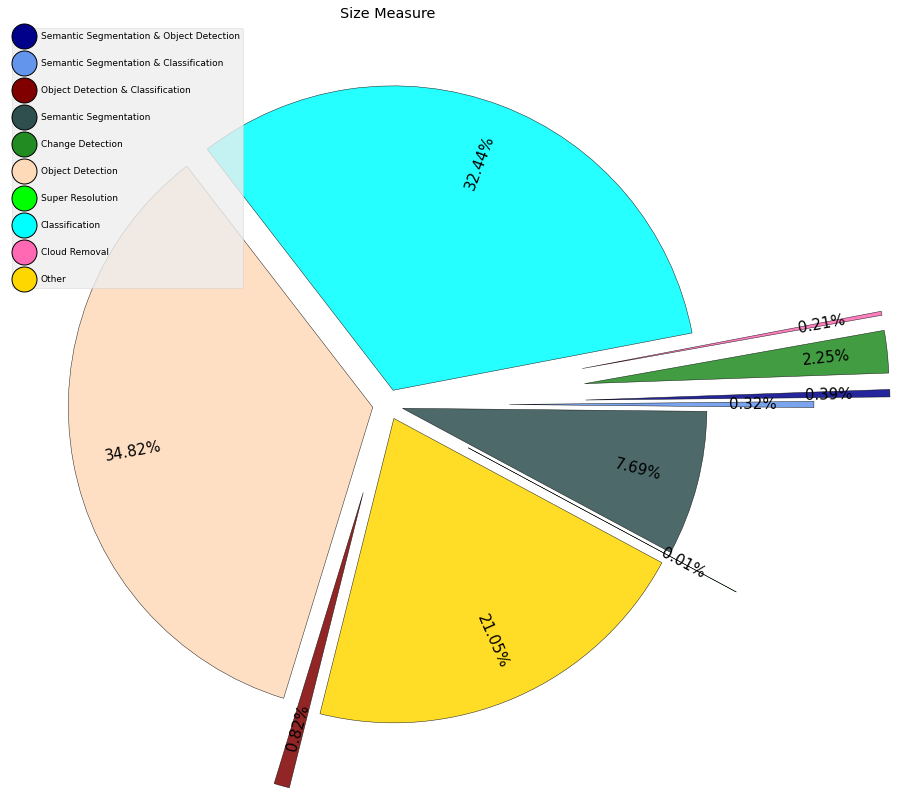

In [ ]:
# ds_sub = b.groupby(['Task']).sum()['Size Measure']

# explode = np.ones((10, )) * 0.05
explode = [0.65, 0.65, 0.05, 0.05, 0.3, 0.05, 0.3, 0.05, 0.4, 0.65]
# explode = np.ones((7, )) * 0.05
plt.figure(figsize=(14, 14))
patches, labels, pct_texts = plt.pie(ds_sub, autopct='%.2f%%', startangle=2, 
                                     rotatelabels=True, pctdistance=0.8, 
                                     shadow=False, colors=COLORS, 
                                     textprops={'fontsize': 15, 'color':'k'},
                                     explode=explode, 
                                     wedgeprops={'alpha':0.85, 'edgecolor':'k',
                                                 'linewidth':0.5})
for label, pct_text in zip(labels, pct_texts):
    pct_text.set_rotation(label.get_rotation())
# plt.legend(names, loc='upper left', prop={'size': 10})
plt.legend(handles=legend_elements, loc='upper left', labelspacing=2, prop={'size': 9})
plt.title('Size Measure')
plt.savefig('SizeMeasure Pie Chart.png', dpi=600, bbox_inches='tight', pad_inches=0.1)
plt.savefig('SizeMeasure Pie Chart.svg', dpi=600, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [ ]:
ds_sub = b.groupby(['Task']).sum()['Volume (MB)']
print(ds_sub)

Task
CD                95048.0
CR               272000.0
Class           4178351.7
OD               900495.5
OD/Class          96700.0
Other           1813700.0
SR                  762.0
SemSeg           668573.0
SemSeg/Class     525380.0
SemSeg/OD         53350.0
Name: Volume (MB), dtype: float64


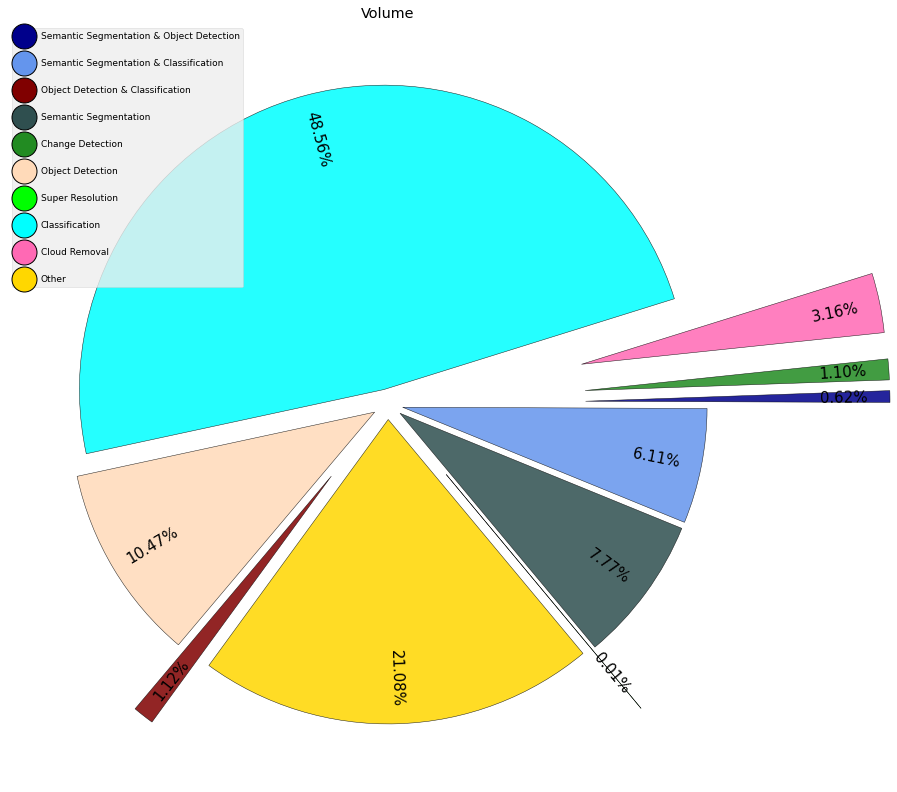

In [ ]:
ds_sub = b.groupby(['Task']).sum()['Volume (MB)']

# explode = np.ones((10, )) * 0.05
explode = [0.65, 0.65, 0.05, 0.05, 0.3, 0.05, 0.3, 0.05, 0.05, 0.65]
# explode = np.ones((7, )) * 0.05
plt.figure(figsize=(14, 14))
patches, labels, pct_texts = plt.pie(ds_sub, autopct='%.2f%%', startangle=2, 
                                     rotatelabels=True, pctdistance=0.85, 
                                     shadow=False, colors=COLORS, 
                                     textprops={'fontsize': 15, 'color': 'k'},
                                     explode=explode, # labels=names, 
                                     wedgeprops={'alpha':0.85, 'edgecolor':'k',
                                                 'linewidth':0.5})
for label, pct_text in zip(labels, pct_texts):
    pct_text.set_rotation(label.get_rotation())
# plt.legend(names, loc='upper left', prop={'size': 10})
plt.legend(handles=legend_elements, loc='upper left', labelspacing=2, prop={'size': 9})
plt.title('Volume')
plt.savefig('Volume Pie Chart.png', dpi=600, bbox_inches='tight', pad_inches=0.1)
plt.savefig('Volume Pie Chart.svg', dpi=600, bbox_inches='tight', pad_inches=0.1)
plt.show()

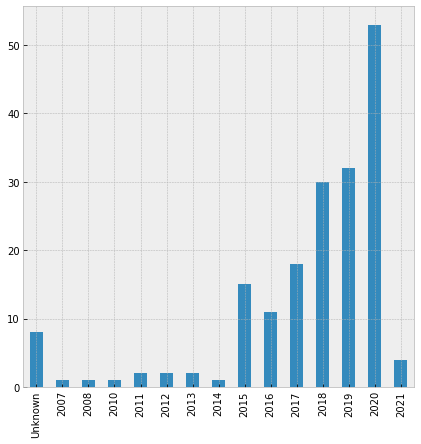

In [ ]:
plt.figure(figsize=(7, 7))
ds['Year of publication'].value_counts().reindex(np.sort(pd.unique(ds['Year of publication']))).plot(kind='bar')
plt.xlim([-0.5, 14.5])
plt.xticks(ticks=range(15), labels=['Unknown'] + g)
plt.savefig('HistOfYears.png', dpi=600)
plt.show()